In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Basic Feature Engineering

In [87]:
df = pd.read_csv("data.csv",parse_dates=["posted","scraped"])

df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False


In [38]:
# Verifying that we have one image per row
df.groupby(["fname"],as_index=False).agg({"upvotes":"nunique"})

,fname,upvotes
0,000z1ia2c0281.jpg,1
1,000zkxooaqw81.jpg,1
2,0021wtqqfcr81.jpg,1
3,002agesvihj81.jpg,1
4,003tyed0o1x81.jpg,1
...,...,...
58407,zzz0jtj07t081.jpg,1
58408,zzz2g9aijba81.jpg,1
58409,zzzikxwv80891.jpg,1
58410,zzzmow75ei681.jpg,1


#### Age of the post in hours

In [96]:
df["age"] = (df.scraped - df.posted).dt.total_seconds()//3600

In [35]:
# 6 days ago is the minumum
df.age.min()/24

6.000003143460649

In [36]:
# 15 days ago is the max
df.age.max()/24

14.994753571689815

<AxesSubplot:xlabel='age', ylabel='Count'>

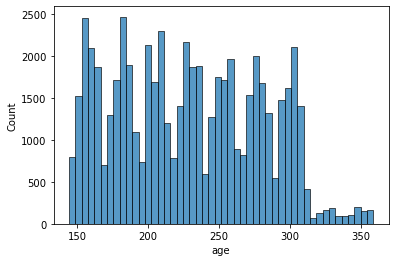

In [51]:
# Clear periodic trend around each day
sns.histplot(data=df,x="age")

<AxesSubplot:xlabel='age', ylabel='upvotes'>

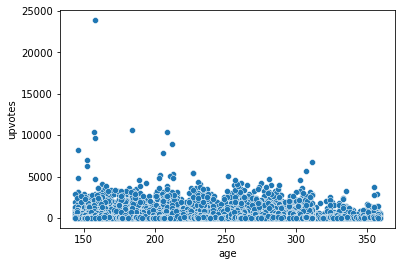

In [54]:
# Does not look like age has a strong correlation (I attempted to remove this by looking backwards a minimum of 6 days)
sns.scatterplot(data=df,x="age",y="upvotes")

#### Weekday and Hourly data

In [86]:
df.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,test,weekday,hour,weekday_number
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,False,Saturday,11,5
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,False,Saturday,2,5
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,False,Friday,16,4
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,False,Friday,16,4
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,False,Friday,15,4


In [89]:
df["weekday"] = df.posted.dt.day_name()
df["weekday_number"] = df.posted.dt.dayofweek
df["hour"] = df.posted.dt.hour

<AxesSubplot:xlabel='weekday', ylabel='upvotes'>

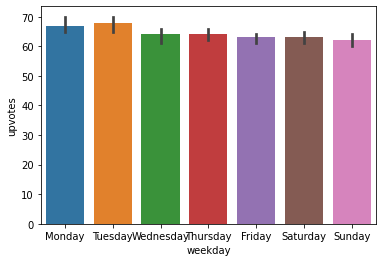

In [99]:
sns.barplot(data=df.sort_values("weekday_number"),x="weekday",y="upvotes",estimator=np.median)

<AxesSubplot:xlabel='weekday', ylabel='upvotes'>

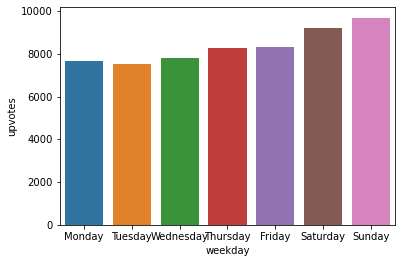

In [81]:
sns.barplot(data=df.sort_values("weekday_number"),x="weekday",y="upvotes",estimator=len)

<AxesSubplot:xlabel='hour', ylabel='upvotes'>

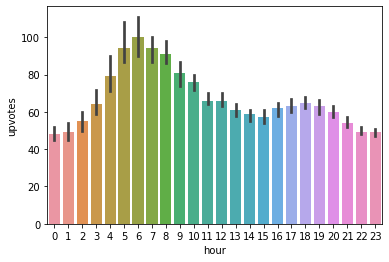

In [100]:
sns.barplot(data=df,x="hour",y="upvotes",estimator=np.median)

<AxesSubplot:xlabel='hour', ylabel='upvotes'>

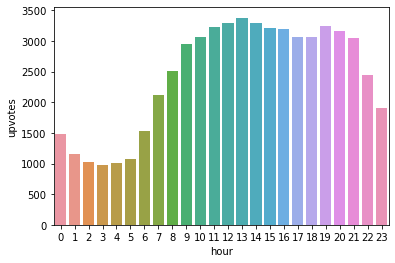

In [82]:
sns.barplot(data=df,x="hour",y="upvotes",estimator=len)

It does not appear that weekends are any different than weekdays

<AxesSubplot:xlabel='hour', ylabel='upvotes'>

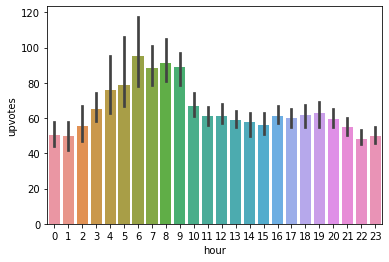

In [127]:
sns.barplot(data=df[df.weekday.isin(["Saturday","Sunday"])],x="hour",y="upvotes",estimator = np.median)

<AxesSubplot:xlabel='hour', ylabel='upvotes'>

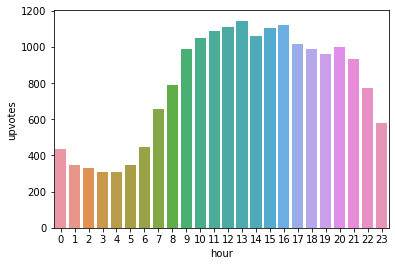

In [98]:
sns.barplot(data=df[df.weekday.isin(["Saturday","Sunday"])],x="hour",y="upvotes",estimator=len)

#### Date

In [125]:
df["date"] = pd.to_datetime(df.posted.dt.date)

In [141]:
df["year"] = df.posted.dt.year
df["month"] = df.posted.dt.month
df["yrmnth"] = (df.year-2021)*12 + df.month

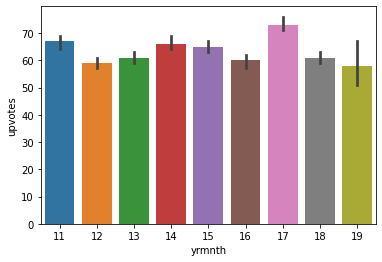

In [143]:
sns.barplot(data=df,x="yrmnth",y="upvotes",estimator=np.median);

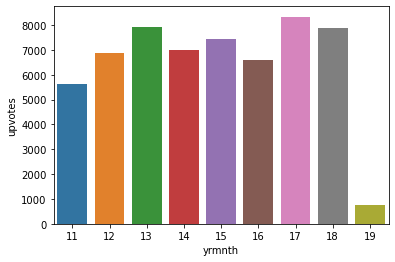

In [144]:
sns.barplot(data=df,x="yrmnth",y="upvotes",estimator=len);

##### Upvotes EDA


My initial concern is the skew of upvotes.  There are two main ways to browse reddit: New and Hot.  Most posts don't gain enough traction in order to qualify for hot.  However, once a post is popular enough to be recommended inside hot, it's popularity explodes.  This fear seems to be correct, looking at the data.

Luckily, I'm not trying to build a predictive model oriented on determining the exact number of upvotes.  Instead, I'm training a model for descriptive purposes and I will be able to do so by predicting the magnitude of upvotes rather than raw number.

In [122]:
df[["upvotes","upvotes_logged"]].describe()

,upvotes,upvotes_logged
count,58412.000000,58412.000000
mean,183.092241,4.286910
std,372.143754,1.331605
min,0.000000,0.000000
25%,28.000000,3.367296
50%,64.000000,4.174387
75%,168.000000,5.129899
max,23878.000000,10.080755


<AxesSubplot:xlabel='upvotes', ylabel='Count'>

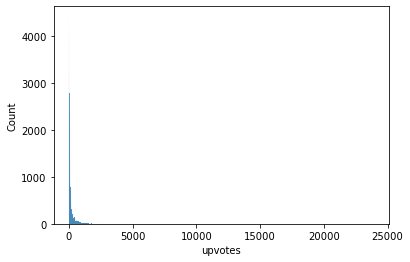

In [101]:
sns.histplot(data=df,x="upvotes");

In [107]:
df["upvotes_logged"] = np.log(df.upvotes+1)

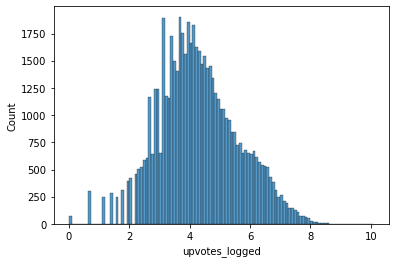

In [108]:
sns.histplot(data=df,x="upvotes_logged");

#### Subreddit EDA

<AxesSubplot:xlabel='category', ylabel='upvotes'>

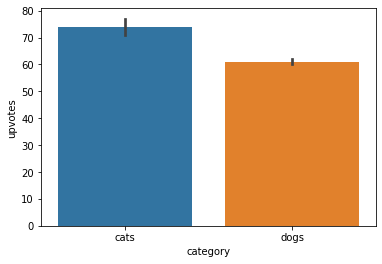

In [146]:
sns.barplot(data=df,x="category",y="upvotes",estimator=np.median);

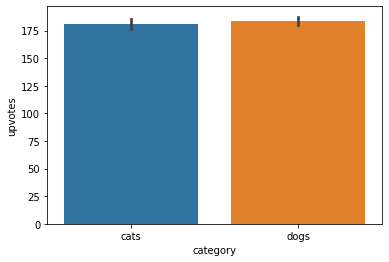

In [148]:
sns.barplot(data=df,x="category",y="upvotes");

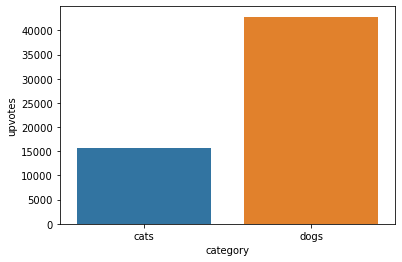

In [147]:
sns.barplot(data=df,x="category",y="upvotes",estimator=len);

#### Subscribers

In [238]:
sub = pd.read_csv("subscribers.csv",parse_dates=["timestamp"])

sub["date"] = sub.timestamp.dt.date


sub.head()

,timestamp,category,subreddit,subscribers,date
0,2021-11-16 11:32:12.640061,cats,catpictures,142344,2021-11-16
1,2021-11-16 11:32:22.766378,cats,blackcats,272381,2021-11-16
2,2021-11-16 11:32:32.901743,cats,WhiteCats,1972,2021-11-16
3,2021-11-16 11:32:43.014013,cats,graycats,751,2021-11-16
4,2021-11-16 11:32:53.128564,cats,CalicoKittys,11384,2021-11-16


**Writing Code to join subscribers to df**

In [239]:
sub = sub.pivot(index="date",columns=["subreddit"],values="subscribers")

# Correcting any missing dates
daterange = pd.date_range(start=df.date.min(),end=df.date.max(),freq="D")
sub = sub.reindex(daterange)

# Filling in the new NULL values
sub.interpolate(method="linear",inplace=True)
sub.bfill(inplace=True)


# Adding the date back into the columns so we can melt the updated dataset
sub["date"] = pd.to_datetime(sub.index)
sub = pd.melt(sub,id_vars="date")


# Joining the two dataframes together
df2 = df.merge(sub.rename(columns={"value":"subscribers"}),how="left",on=["date","subreddit"])

In [240]:
df2.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,...,age,weekday,weekday_number,hour,upvotes_logged,date,year,month,yrmnth,subscribers
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,...,190.0,Saturday,5,11,5.513429,2021-11-13,2021,11,11,142344.0
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,...,199.0,Saturday,5,2,3.218876,2021-11-13,2021,11,11,142344.0
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,...,208.0,Friday,4,16,6.059123,2021-11-12,2021,11,11,142344.0
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,...,209.0,Friday,4,16,5.283204,2021-11-12,2021,11,11,142344.0
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,...,209.0,Friday,4,15,6.431331,2021-11-12,2021,11,11,142344.0


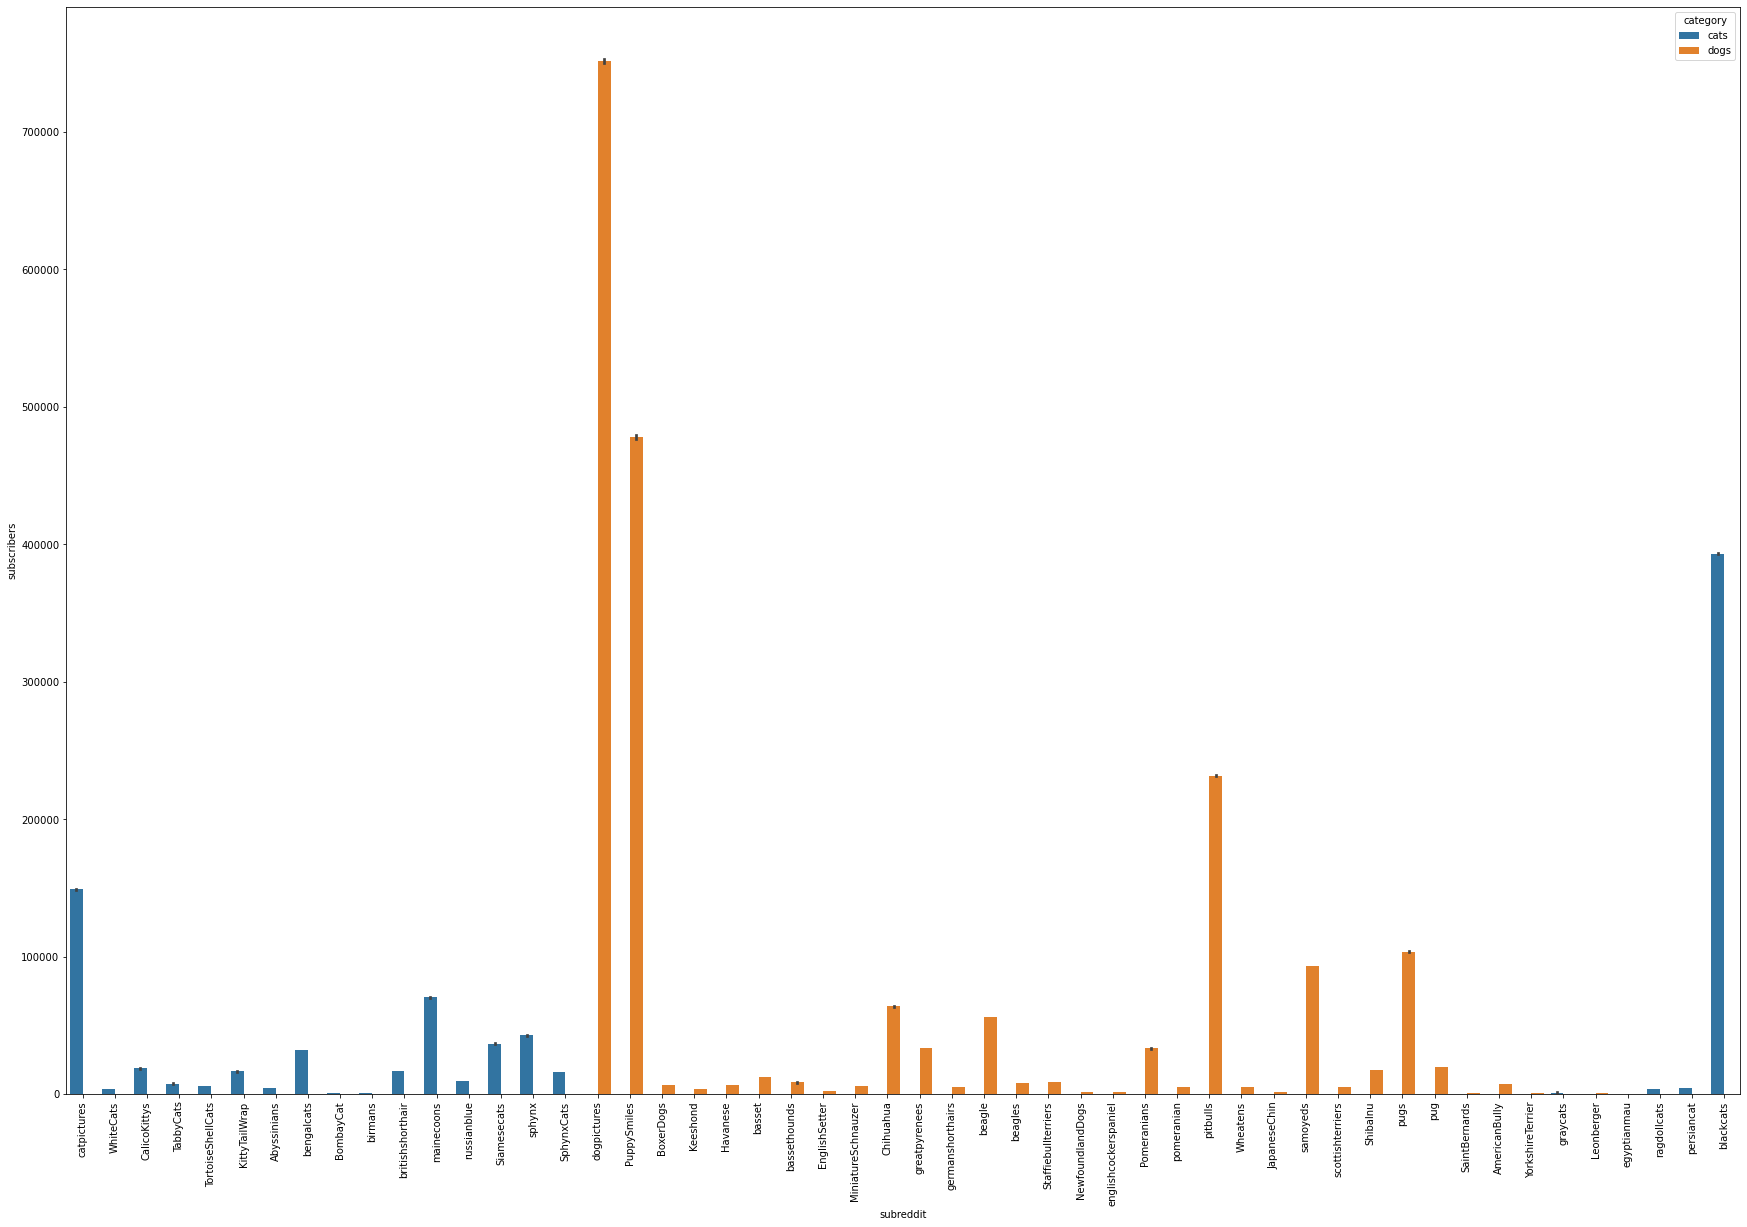

In [245]:
fig,ax = plt.subplots(figsize=(30,20))

sns.barplot(data=df2,ax=ax,x="subreddit",y="subscribers",hue="category")
plt.xticks(rotation = 90);

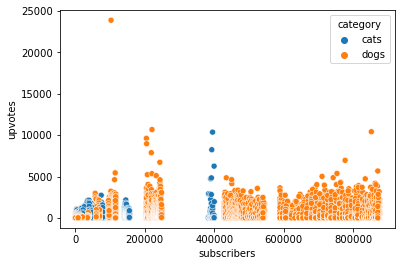

In [248]:
sns.scatterplot(data=df2,x="subscribers",y="upvotes",hue="category");

In [249]:
df.upvotes.max()

23878.0

In [252]:
df2[df2.upvotes==23878].title.values

array(["7 days of sheltering from explosions, then 3 days of almost non-stop driving, sleeping on floors, in the car, no shower for days, but we're not leaving our beloved old man behind :) He is our talisman in these tiring times for Ukraine. 🇺🇦"],
      dtype=object)

In [256]:
df2.loc[df2.title.str.contains("Ukraine"),"ukraine"] = True

In [258]:
df2.loc[df2.ukraine.isna(),"ukraine"] = False

In [308]:
df2.subreddit.unique()

array(['catpictures', 'WhiteCats', 'CalicoKittys', 'TabbyCats',
       'TortoiseShellCats', 'KittyTailWrap', 'Abyssinians', 'bengalcats',
       'BombayCat', 'birmans', 'britishshorthair', 'mainecoons',
       'russianblue', 'Siamesecats', 'sphynx', 'SphynxCats',
       'dogpictures', 'PuppySmiles', 'BoxerDogs', 'Keeshond', 'Havanese',
       'basset', 'bassethounds', 'EnglishSetter', 'MiniatureSchnauzer',
       'Chihuahua', 'greatpyrenees', 'germanshorthairs', 'beagle',
       'beagles', 'Staffiebullterriers', 'NewfoundlandDogs',
       'englishcockerspaniel', 'Pomeranians', 'pomeranian', 'pitbulls',
       'Wheatens', 'JapaneseChin', 'samoyeds', 'scottishterriers',
       'ShibaInu', 'pugs', 'pug', 'SaintBernards', 'AmericanBully',
       'YorkshireTerrier', 'graycats', 'Leonberger', 'egyptianmau',
       'ragdollcats', 'persiancat', 'blackcats'], dtype=object)

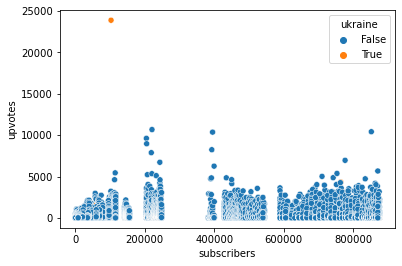

In [315]:
sns.scatterplot(data=df2,x="subscribers",y="upvotes",hue="ukraine");

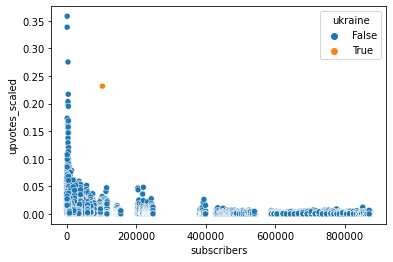

In [316]:
sns.scatterplot(data=df2,x="subscribers",y="upvotes_scaled",hue="ukraine");

In [261]:
df2.groupby(["ukraine"],as_index=False).agg({"upvotes":"median"})

,ukraine,upvotes
0,False,64.0
1,True,308.5


In [262]:
df2["upvotes_scaled"] = df2.upvotes/df2.subscribers

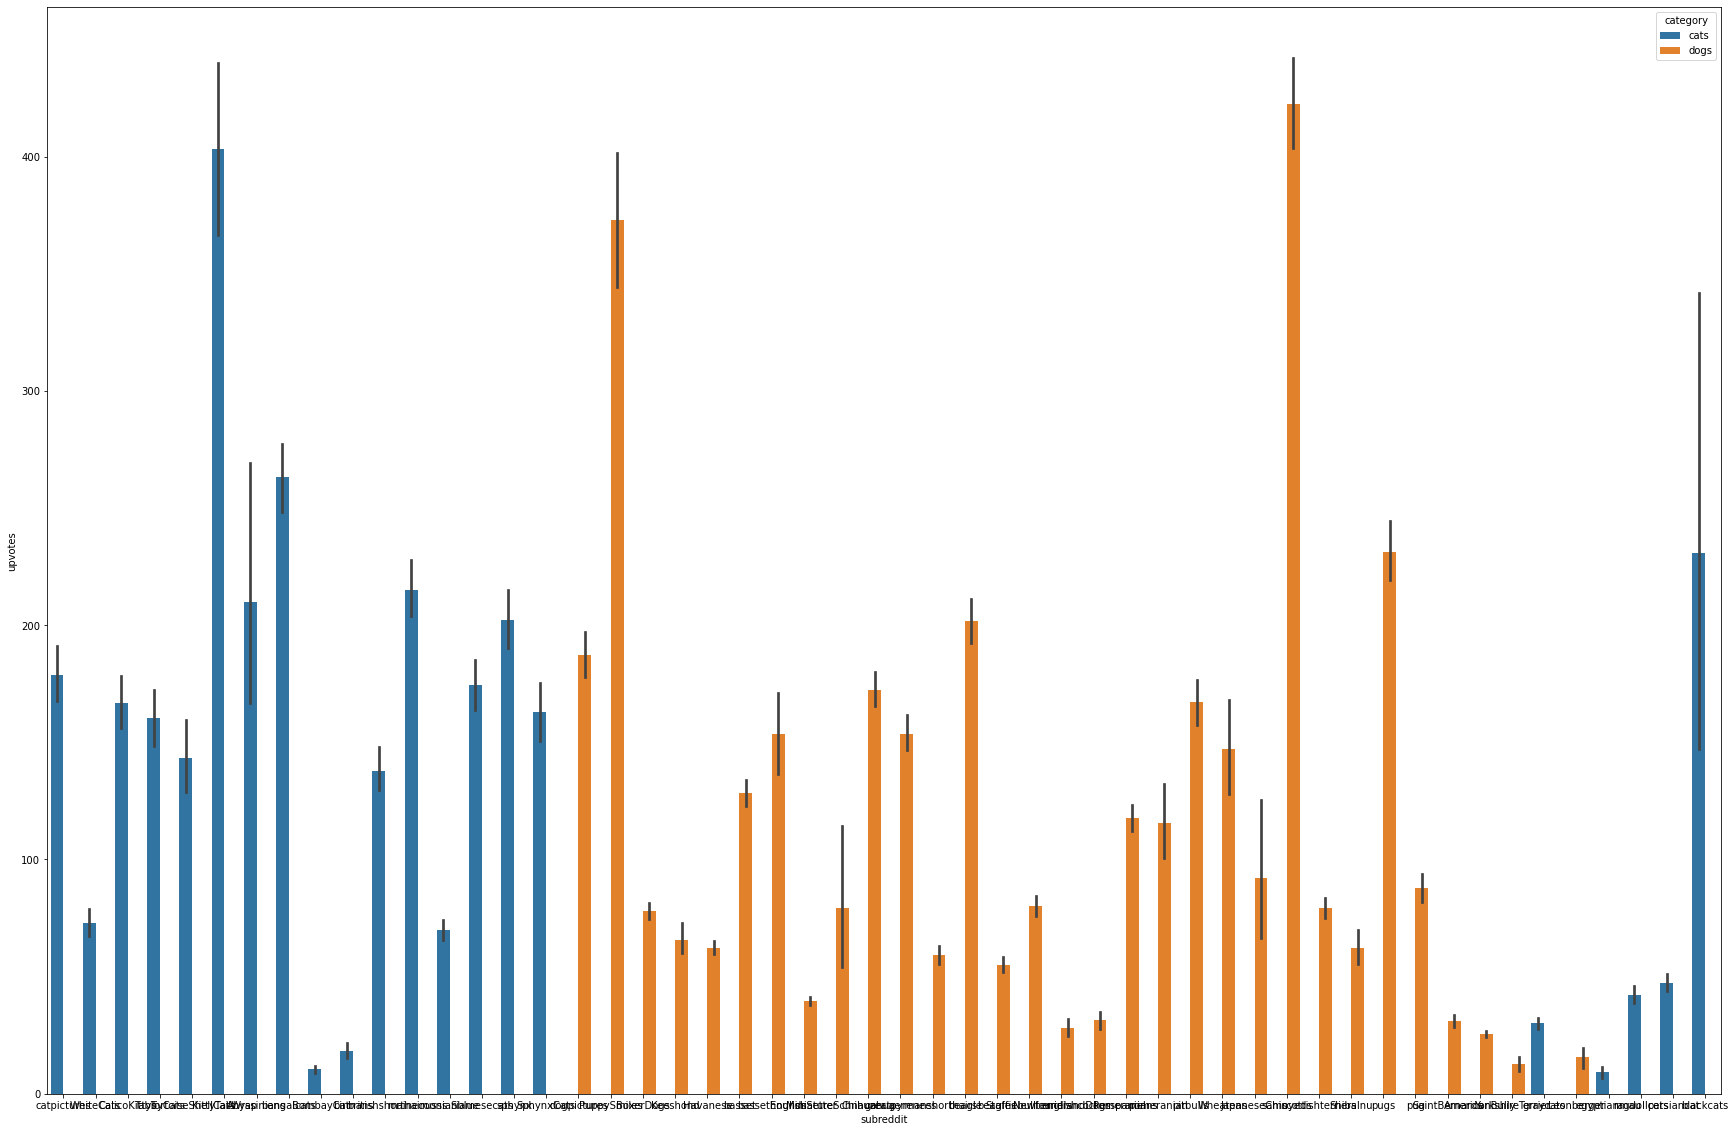

In [265]:
fig,ax = plt.subplots(figsize=(30,20))

sns.barplot(data=df2,x="subreddit",y="upvotes",hue="category");

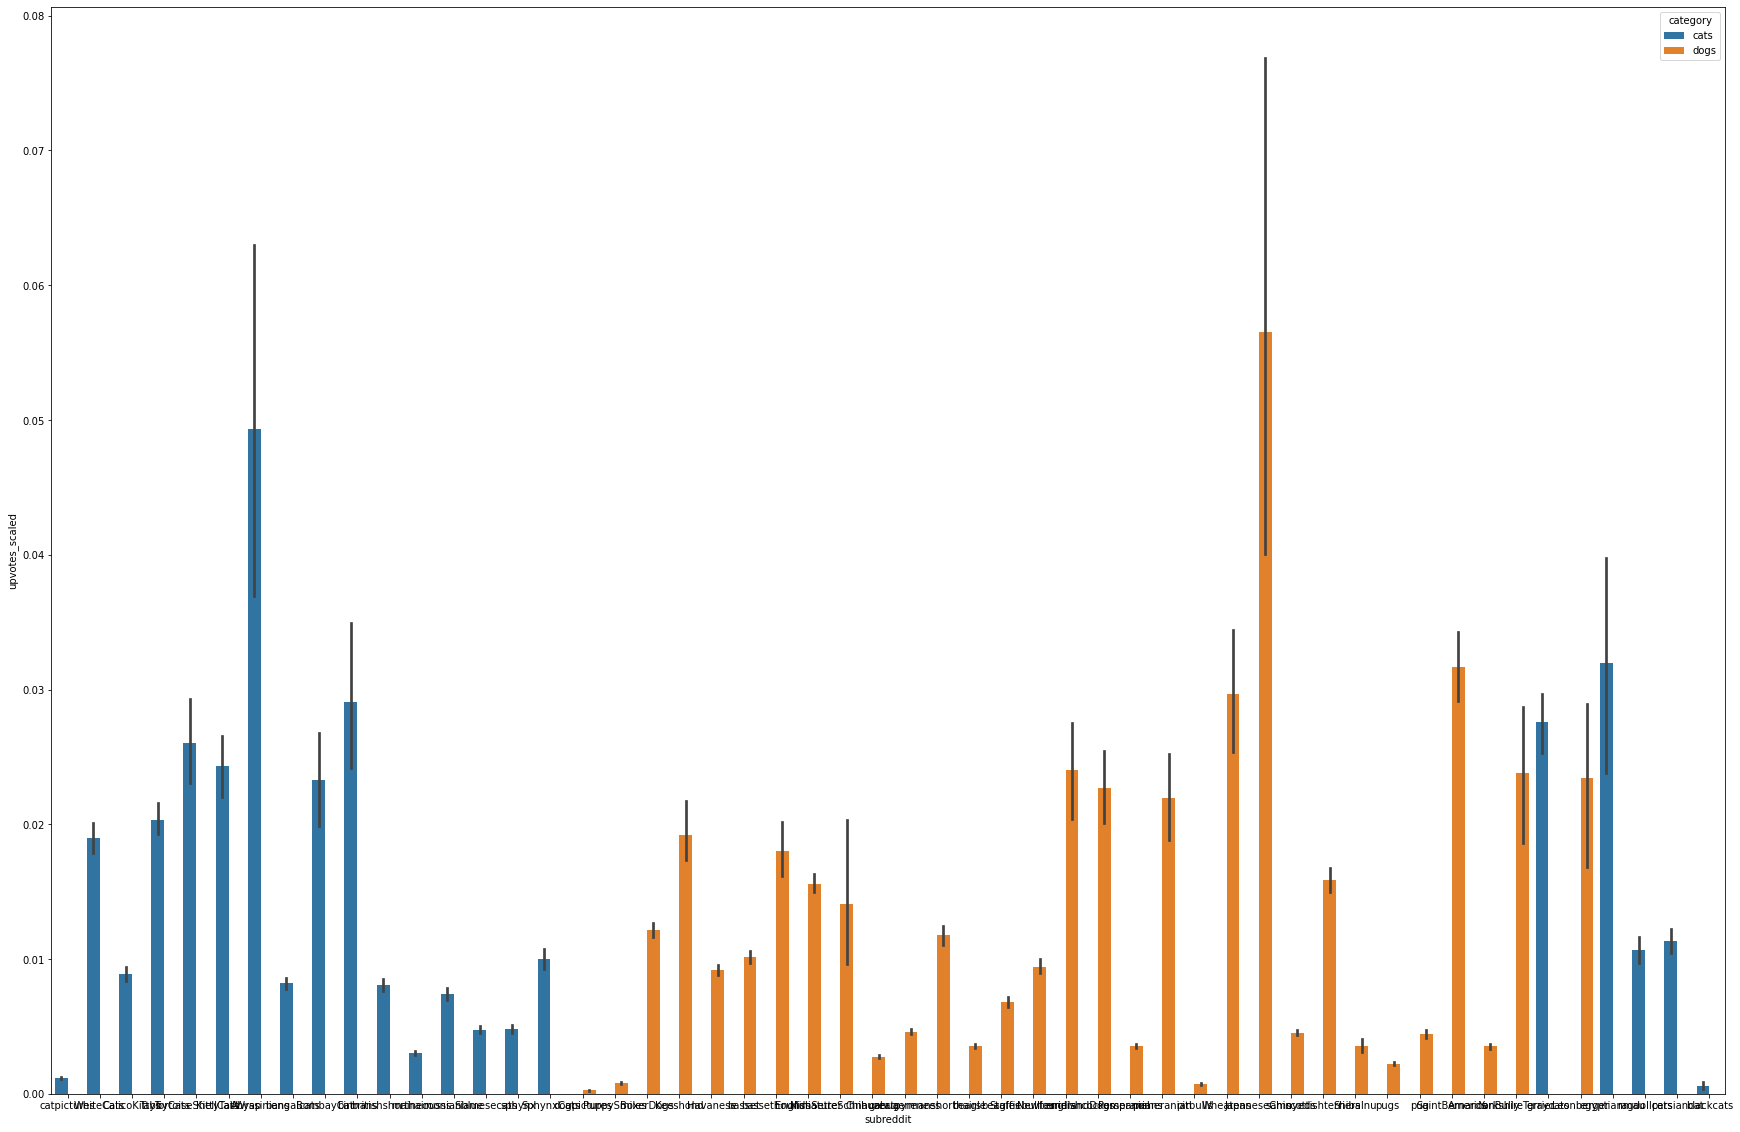

In [266]:
fig,ax = plt.subplots(figsize=(30,20))

sns.barplot(data=df2,x="subreddit",y="upvotes_scaled",hue="category");

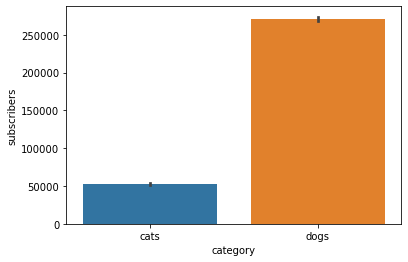

In [267]:
sns.barplot(data=df2,x="category",y="subscribers");

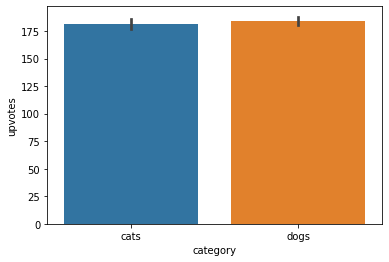

In [268]:
sns.barplot(data=df2,x="category",y="upvotes");

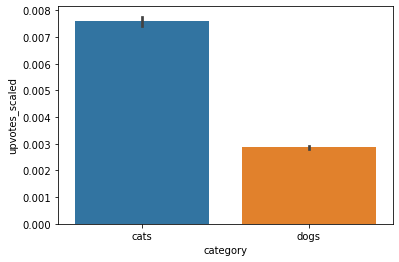

In [269]:
sns.barplot(data=df2,x="category",y="upvotes_scaled");

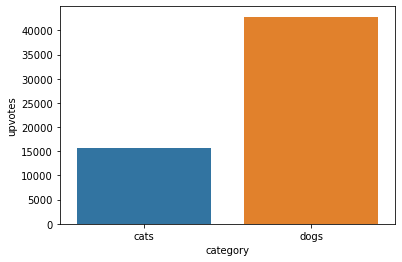

In [270]:
sns.barplot(data=df2,x="category",y="upvotes",estimator=len);

#### Competition metrics

In [288]:
stage1 = df2.groupby(["date","subreddit","category","hour"],as_index=False).agg({"upvotes":"count"}).rename(columns={"upvotes":"competition_subreddit"})

stage1

,date,subreddit,category,hour,competition_subreddit
0,2021-11-06,Abyssinians,cats,15,1
1,2021-11-06,Abyssinians,cats,18,1
2,2021-11-06,AmericanBully,dogs,14,1
3,2021-11-06,AmericanBully,dogs,18,1
4,2021-11-06,BoxerDogs,dogs,14,3
...,...,...,...,...,...
39223,2022-07-04,pitbulls,dogs,5,1
39224,2022-07-04,pugs,dogs,0,1
39225,2022-07-04,pugs,dogs,5,1
39226,2022-07-04,sphynx,cats,2,1


In [289]:
stage2 = stage1.groupby(["date","hour","category"],as_index=False).agg({"competition_subreddit":"sum"}).rename(columns={"competition_subreddit":"competition_category"})

stage2

,date,hour,category,competition_category
0,2021-11-06,9,cats,1
1,2021-11-06,9,dogs,3
2,2021-11-06,10,cats,4
3,2021-11-06,10,dogs,5
4,2021-11-06,11,cats,2
...,...,...,...,...
10390,2022-07-04,2,dogs,1
10391,2022-07-04,3,dogs,2
10392,2022-07-04,4,cats,2
10393,2022-07-04,4,dogs,5


In [290]:
stage3 = stage2.groupby(["date","hour"],as_index=False).agg({"competition_category":"sum"}).rename(columns={"competition_category":"competition_total"})

stage3

,date,hour,competition_total
0,2021-11-06,9,4
1,2021-11-06,10,9
2,2021-11-06,11,9
3,2021-11-06,12,14
4,2021-11-06,13,7
...,...,...,...
5497,2022-07-04,1,3
5498,2022-07-04,2,2
5499,2022-07-04,3,2
5500,2022-07-04,4,7


In [291]:
df3 = df2.merge(stage1,how="left",on=["date","hour","subreddit","category"]).merge(stage2,how="left",on=["date","hour","category"]).merge(stage3,how="left",on=["date","hour"])

df3.head()

,fname,url,category,subreddit,title,description,upvotes,posted,scraped,niche,...,date,year,month,yrmnth,subscribers,ukraine,upvotes_scaled,competition_subreddit,competition_category,competition_total
0,cgptykrzcez71.jpg,https://i.redd.it/cgptykrzcez71.jpg,cats,catpictures,Caturday morning TV 😺,NaN,247.0,2021-11-13 11:22:11,2021-11-21 09:28:28.376338,0.0,...,2021-11-13,2021,11,11,142344.0,False,0.001735,1,5,17
1,EGjVMqx.jpg,https://i.imgur.com/EGjVMqx.jpg,cats,catpictures,Round loaf!,NaN,24.0,2021-11-13 02:23:31,2021-11-21 09:28:28.376338,0.0,...,2021-11-13,2021,11,11,142344.0,False,0.000169,1,2,4
2,y45936kis8z71.jpg,https://i.redd.it/y45936kis8z71.jpg,cats,catpictures,Taken over fall wreath,NaN,427.0,2021-11-12 16:38:49,2021-11-21 09:28:28.376338,0.0,...,2021-11-12,2021,11,11,142344.0,False,0.003000,2,7,21
3,irl2nzyro8z71.jpg,https://i.redd.it/irl2nzyro8z71.jpg,cats,catpictures,"My kitten, Topaz!",NaN,196.0,2021-11-12 16:17:45,2021-11-21 09:28:28.376338,0.0,...,2021-11-12,2021,11,11,142344.0,False,0.001377,2,7,21
4,vlsh4hijg8z71.jpg,https://i.redd.it/vlsh4hijg8z71.jpg,cats,catpictures,My Tom is not impressed having to wait for the...,NaN,620.0,2021-11-12 15:31:23,2021-11-21 09:28:28.376338,0.0,...,2021-11-12,2021,11,11,142344.0,False,0.004356,1,4,19


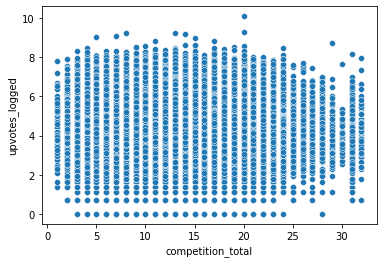

In [294]:
sns.scatterplot(data=df3,x="competition_total",y="upvotes_logged");

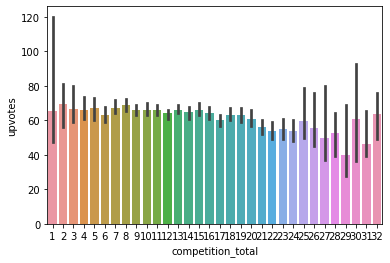

In [298]:
sns.barplot(data=df3,x="competition_total",y="upvotes",estimator=np.median);

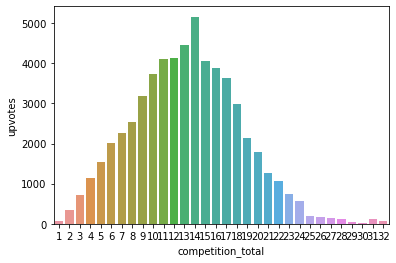

In [303]:
sns.barplot(data=df3,x="competition_total",y="upvotes",estimator=len);

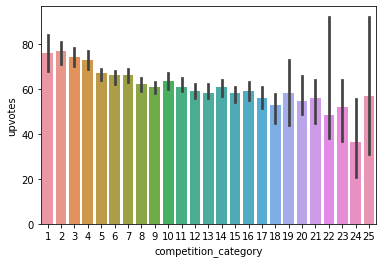

In [299]:
sns.barplot(data=df3,x="competition_category",y="upvotes",estimator=np.median);

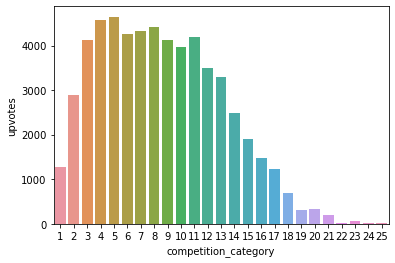

In [302]:
sns.barplot(data=df3,x="competition_category",y="upvotes",estimator=len);

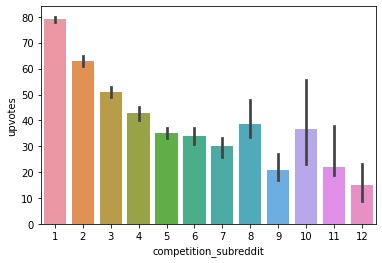

In [319]:
sns.barplot(data=df3,x="competition_subreddit",y="upvotes",estimator=np.median);

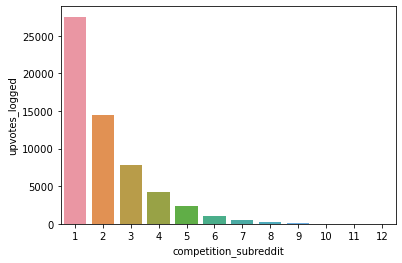

In [317]:
sns.barplot(data=df3,x="competition_subreddit",y="upvotes",estimator=len);

In [320]:
df3.columns

Index(['fname', 'url', 'category', 'subreddit', 'title', 'description',
       'upvotes', 'posted', 'scraped', 'niche', 'test', 'age', 'weekday',
       'weekday_number', 'hour', 'upvotes_logged', 'date', 'year', 'month',
       'yrmnth', 'subscribers', 'ukraine', 'upvotes_scaled',
       'competition_subreddit', 'competition_category', 'competition_total'],
      dtype='object')